### Questions: Does Bank Cash Rate has any impact on realestate market?

### Method: Use quarterly data and calculate the percentage of increase of median sold price, median rent price and numbers of listing rent/listing sold and actual sold.

### Conclusions: The Covid trully has impact on property market and it impact immedieatly during Jan-Mar/2020 and Jul-Sep/2020, and the rent market basically has the same trend with sold market but the covid makes it goes in an opposite way, more people are likely to rent and not buy. Bank interests rate drop stimulate the property market and makes it increase eventually, but bank interests has laybacks.

In [1]:
import requests
import json
import gmaps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv

In [2]:
Cash_Rate_RBA = pd.read_csv("Resources/Cash_Rate_RBA.csv")
Cash_Rate_RBA

,Effective Date,Change% Points,Cash rate target from RBA
0,Jan-Mar/2019,0.0000,0.0150
1,Apr-Jun/2019,-0.0025,0.0125
2,Jul-Sep/2019,-0.0025,0.0100
3,Oct-Dec/2019,-0.0025,0.0075
4,Jan-Mar/2020,-0.0050,0.0025
5,Apr-Jun/2020,0.0000,0.0025
6,Jul-Sep/2020,0.0000,0.0025
7,Oct-Dec/2020,-0.0015,0.0010
8,Jan-Mar/2021,0.0000,0.0010
9,Apr-Jun/2021,0.0000,0.0010


In [61]:
quarter_data_2019_1st = pd.read_csv("Resources/raw_data/quarter_data_2019_1st.csv")
quarter_data_2019_2nd = pd.read_csv("Resources/raw_data/quarter_data_2019_2nd.csv")
quarter_data_2019_3rd = pd.read_csv("Resources/raw_data/quarter_data_2019_3rd.csv")
quarter_data_2019_4th = pd.read_csv("Resources/raw_data/quarter_data_2019_4th.csv")
quarter_data_2020_1st = pd.read_csv("Resources/raw_data/quarter_data_2020_1st.csv")
quarter_data_2020_2nd = pd.read_csv("Resources/raw_data/quarter_data_2020_2nd.csv")
quarter_data_2020_3rd = pd.read_csv("Resources/raw_data/quarter_data_2020_3rd.csv")
quarter_data_2020_4th = pd.read_csv("Resources/raw_data/quarter_data_2020_4th.csv")
quarter_data_2021_1st = pd.read_csv("Resources/raw_data/quarter_data_2021_1st.csv")
quarter_data_2021_2nd = pd.read_csv("Resources/raw_data/quarter_data_2021_2nd.csv")
quarter_data_2019_1st

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,990000.0,11.0,1650000.0,790000.0,790000.0,860000.0,1450000.0,...,1190000.0,27.0,1750000.0,115000.0,13.0,4.0,650.0,49.0,1250.0,400.0
1,3040,Aberfeldie,647,1300000.0,53.0,2980000.0,297000.0,447000.0,658000.0,1740000.0,...,1339000.0,109.0,5000000.0,280000.0,36.0,12.0,540.0,140.0,1400.0,290.0
2,3042,Airport West,757,950000.0,15.0,1500000.0,592000.0,592000.0,800000.0,1135000.0,...,950000.0,36.0,1400000.0,650000.0,14.0,4.0,545.0,45.0,1350.0,270.0
3,3021,Albanvale,787,600000.0,82.0,1281000.0,345000.0,386000.0,520000.0,656000.0,...,600000.0,268.0,2500000.0,80000.0,34.0,9.0,360.0,169.0,1200.0,190.0
4,3206,Albert Park,797,2475000.0,10.0,5500000.0,1353000.0,1353000.0,1865000.0,2800000.0,...,2787000.0,15.0,13000000.0,1890000.0,8.0,3.0,850.0,31.0,1700.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3024,Wyndham Vale,45307,458000.0,74.0,830000.0,307000.0,360000.0,432000.0,533000.0,...,509000.0,418.0,780000.0,100000.0,10.0,5.0,350.0,161.0,540.0,300.0
385,3085,Yallambie,45427,NaN,9.0,955000.0,570000.0,NaN,NaN,NaN,...,720000.0,21.0,1350000.0,590000.0,7.0,1.0,460.0,14.0,1000.0,320.0
386,3091,Yarrambat,45747,NaN,2.0,1450000.0,775000.0,NaN,NaN,NaN,...,NaN,9.0,2500000.0,750000.0,2.0,1.0,NaN,1.0,520.0,520.0
387,3013,Yarraville,45777,955000.0,39.0,2175000.0,331000.0,554000.0,740000.0,1170000.0,...,945000.0,85.0,2100000.0,333000.0,40.0,13.0,530.0,152.0,920.0,290.0


In [ ]:
quarter_sold_price_difference1 = quarter_data_2019_2nd["medianSoldPrice"] - quarter_data_2019_1st["medianSoldPrice"]
quarter_sold_price_difference2 = quarter_data_2019_3rd["medianSoldPrice"] - quarter_data_2019_2nd["medianSoldPrice"]
quarter_sold_price_difference3 = quarter_data_2019_4th["medianSoldPrice"] - quarter_data_2019_3rd["medianSoldPrice"]
quarter_sold_price_difference4 = quarter_data_2020_1st["medianSoldPrice"] - quarter_data_2019_4th["medianSoldPrice"]
quarter_sold_price_difference5 = quarter_data_2020_2nd["medianSoldPrice"] - quarter_data_2019_1st["medianSoldPrice"]
quarter_sold_price_difference6 = quarter_data_2020_3rd["medianSoldPrice"] - quarter_data_2020_2nd["medianSoldPrice"]
quarter_sold_price_difference7 = quarter_data_2020_4th["medianSoldPrice"] - quarter_data_2020_3rd["medianSoldPrice"]
quarter_sold_price_difference8 = quarter_data_2021_1st["medianSoldPrice"] - quarter_data_2020_4th["medianSoldPrice"]
quarter_sold_price_difference9 = quarter_data_2021_2nd["medianSoldPrice"] - quarter_data_2021_1st["medianSoldPrice"]

price_difference_pd1 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference1})
price_difference_pd2 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference2})

price_difference_pd3 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference3})

price_difference_pd4 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference4})

price_difference_pd5 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference5})

price_difference_pd6 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference6})

price_difference_pd7 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference7})

price_difference_pd8 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference8})
price_difference_pd9 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Sold Price difference" : quarter_sold_price_difference9})


price_difference_pd1 = price_difference_pd1.dropna()
price_difference_pd2 = price_difference_pd2.dropna()
price_difference_pd3 = price_difference_pd3.dropna()
price_difference_pd4 = price_difference_pd4.dropna()
price_difference_pd5 = price_difference_pd5.dropna()
price_difference_pd6 = price_difference_pd6.dropna()
price_difference_pd7 = price_difference_pd7.dropna()
price_difference_pd8 = price_difference_pd8.dropna()
price_difference_pd9 = price_difference_pd9.dropna()

In [5]:
bins = (-8000000000,0,8000000000)
value_change1 = pd.cut(price_difference_pd1["Sold Price difference"], bins=bins).value_counts()
value_change2 = pd.cut(price_difference_pd2["Sold Price difference"], bins=bins).value_counts()
value_change3 = pd.cut(price_difference_pd3["Sold Price difference"], bins=bins).value_counts()
value_change4 = pd.cut(price_difference_pd4["Sold Price difference"], bins=bins).value_counts()
value_change5 = pd.cut(price_difference_pd5["Sold Price difference"], bins=bins).value_counts()
value_change6 = pd.cut(price_difference_pd6["Sold Price difference"], bins=bins).value_counts()
value_change7 = pd.cut(price_difference_pd7["Sold Price difference"], bins=bins).value_counts()
value_change8 = pd.cut(price_difference_pd8["Sold Price difference"], bins=bins).value_counts()
value_change9 = pd.cut(price_difference_pd9["Sold Price difference"], bins=bins).value_counts()


In [9]:
pd_1 = pd.DataFrame({"total_number":value_change1,
                    "Percentage" : value_change1/value_change1.sum()})
pd_1 = pd_1.reset_index()
pd_2 = pd.DataFrame({"total_number":value_change2,
                    "Percentage" : value_change2/value_change2.sum()})
pd_2 = pd_2.reset_index()
pd_3 = pd.DataFrame({"total_number":value_change3,
                    "Percentage" : value_change3/value_change3.sum()})
pd_3 = pd_3.reset_index()
pd_4 = pd.DataFrame({"total_number":value_change4,
                    "Percentage" : value_change4/value_change4.sum()})
pd_4 = pd_4.reset_index()
pd_5 = pd.DataFrame({"total_number":value_change5,
                    "Percentage" : value_change5/value_change5.sum()})
pd_5 = pd_5.reset_index()
pd_6 = pd.DataFrame({"total_number":value_change6,
                    "Percentage" : value_change6/value_change6.sum()})
pd_6 = pd_6.reset_index()
pd_7 = pd.DataFrame({"total_number":value_change7,
                    "Percentage" : value_change7/value_change7.sum()})
pd_7 = pd_7.reset_index()
pd_8 = pd.DataFrame({"total_number":value_change8,
                    "Percentage" : value_change8/value_change8.sum()})
pd_8 = pd_8.reset_index()
pd_9 = pd.DataFrame({"total_number":value_change9,
                    "Percentage" : value_change9/value_change9.sum()})
pd_9 = pd_9.reset_index()
pd_9

,index,total_number,Percentage
0,"(0, 8000000000]",224,0.811594
1,"(-8000000000, 0]",52,0.188406


In [10]:
percentage_change = pd.DataFrame({'Jan-Mar/2019' : [0,0],
                                   'Apr-Jun/2019':pd_1['Percentage'],
                                   'Jul-Sep/2019':pd_2['Percentage'],
                                   'Oct-Dec/2019':pd_3['Percentage'],
                                   'Jan-Mar/2020':pd_4['Percentage'],
                                   'Apr-Jun/2020':pd_5['Percentage'],
                                   'Jul-Sep/2020':pd_6['Percentage'],
                                   'Oct-Dec/2020':pd_7['Percentage'],
                                   'Jan-Mar/2021':pd_8['Percentage']
                                 })
percentage_change['Apr-Jun/2021'] = pd_9['Percentage']
percentage_change

,Jan-Mar/2019,Apr-Jun/2019,Jul-Sep/2019,Oct-Dec/2019,Jan-Mar/2020,Apr-Jun/2020,Jul-Sep/2020,Oct-Dec/2020,Jan-Mar/2021,Apr-Jun/2021
0,0,0.555985,0.580153,0.783088,0.704545,0.789883,0.566929,0.669565,0.700855,0.811594
1,0,0.444015,0.419847,0.216912,0.295455,0.210117,0.433071,0.330435,0.299145,0.188406


In [28]:
quarter_rent_price_difference1 = quarter_data_2019_2nd["medianRentListingPrice"] - quarter_data_2019_1st["medianRentListingPrice"]
quarter_rent_price_difference2 = quarter_data_2019_3rd["medianRentListingPrice"] - quarter_data_2019_2nd["medianRentListingPrice"]
quarter_rent_price_difference3 = quarter_data_2019_4th["medianRentListingPrice"] - quarter_data_2019_3rd["medianRentListingPrice"]
quarter_rent_price_difference4 = quarter_data_2020_1st["medianRentListingPrice"] - quarter_data_2019_4th["medianRentListingPrice"]
quarter_rent_price_difference5 = quarter_data_2020_2nd["medianRentListingPrice"] - quarter_data_2019_1st["medianRentListingPrice"]
quarter_rent_price_difference6 = quarter_data_2020_3rd["medianRentListingPrice"] - quarter_data_2020_2nd["medianRentListingPrice"]
quarter_rent_price_difference7 = quarter_data_2020_4th["medianRentListingPrice"] - quarter_data_2020_3rd["medianRentListingPrice"]
quarter_rent_price_difference8 = quarter_data_2021_1st["medianRentListingPrice"] - quarter_data_2020_4th["medianRentListingPrice"]
quarter_rent_price_difference9 = quarter_data_2021_2nd["medianRentListingPrice"] - quarter_data_2021_1st["medianRentListingPrice"]

rent_difference_pd1 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference1})
rent_difference_pd2 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference2})

rent_difference_pd3 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference3})

rent_difference_pd4 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference4})

rent_difference_pd5 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference5})

rent_difference_pd6 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference6})

rent_difference_pd7 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference7})

rent_difference_pd8 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference8})

rent_difference_pd9 = pd.DataFrame({"Postcode" : quarter_data_2019_2nd["Postcode"],
                                    "Suburb" : quarter_data_2019_2nd["Suburb"],
                                   "Rent Price difference" : quarter_rent_price_difference9})


rent_difference_pd1 = rent_difference_pd1.dropna()
rent_difference_pd2 = rent_difference_pd2.dropna()
rent_difference_pd3 = rent_difference_pd3.dropna()
rent_difference_pd4 = rent_difference_pd4.dropna()
rent_difference_pd5 = rent_difference_pd5.dropna()
rent_difference_pd6 = rent_difference_pd6.dropna()
rent_difference_pd7 = rent_difference_pd7.dropna()
rent_difference_pd8 = rent_difference_pd8.dropna()
rent_difference_pd9 = rent_difference_pd9.dropna()

In [29]:
bins = (-8000000000,0,8000000000)
rvalue_change1 = pd.cut(rent_difference_pd1["Rent Price difference"], bins=bins).value_counts()
rvalue_change2 = pd.cut(rent_difference_pd2["Rent Price difference"], bins=bins).value_counts()
rvalue_change3 = pd.cut(rent_difference_pd3["Rent Price difference"], bins=bins).value_counts()
rvalue_change4 = pd.cut(rent_difference_pd4["Rent Price difference"], bins=bins).value_counts()
rvalue_change5 = pd.cut(rent_difference_pd5["Rent Price difference"], bins=bins).value_counts()
rvalue_change6 = pd.cut(rent_difference_pd6["Rent Price difference"], bins=bins).value_counts()
rvalue_change7 = pd.cut(rent_difference_pd7["Rent Price difference"], bins=bins).value_counts()
rvalue_change8 = pd.cut(rent_difference_pd8["Rent Price difference"], bins=bins).value_counts()
rvalue_change9 = pd.cut(rent_difference_pd9["Rent Price difference"], bins=bins).value_counts()

In [30]:
pd_1 = pd.DataFrame({"total_number":rvalue_change1,
                    "Percentage" :rvalue_change1/rvalue_change1.sum()})
pd_1 = pd_1.reset_index()
pd_2 = pd.DataFrame({"total_number":rvalue_change2,
                    "Percentage" : rvalue_change2/rvalue_change2.sum()})
pd_2 = pd_2.reset_index()
pd_3 = pd.DataFrame({"total_number":rvalue_change3,
                    "Percentage" : rvalue_change3/rvalue_change3.sum()})
pd_3 = pd_3.reset_index()
pd_4 = pd.DataFrame({"total_number":rvalue_change4,
                    "Percentage" : rvalue_change4/rvalue_change4.sum()})
pd_4 = pd_4.reset_index()
pd_5 = pd.DataFrame({"total_number":rvalue_change5,
                    "Percentage" : rvalue_change5/rvalue_change5.sum()})
pd_5 = pd_5.reset_index()
pd_6 = pd.DataFrame({"total_number":rvalue_change6,
                    "Percentage" : rvalue_change6/rvalue_change6.sum()})
pd_6 = pd_6.reset_index()
pd_7 = pd.DataFrame({"total_number":rvalue_change7,
                    "Percentage" : rvalue_change7/rvalue_change7.sum()})
pd_7 = pd_7.reset_index()
pd_8 = pd.DataFrame({"total_number":rvalue_change8,
                    "Percentage" : rvalue_change8/rvalue_change8.sum()})
pd_8 = pd_8.reset_index()
pd_9 = pd.DataFrame({"total_number":rvalue_change9,
                    "Percentage" : rvalue_change9/rvalue_change9.sum()})
pd_9 = pd_9.reset_index()
pd_9

,index,total_number,Percentage
0,"(-8000000000, 0]",188,0.686131
1,"(0, 8000000000]",86,0.313869


In [31]:
rpercentage_change = pd.DataFrame({'Jan-Mar/2019' : [0,0],
                                   'Apr-Jun/2019':pd_1['Percentage'],
                                   'Jul-Sep/2019':pd_2['Percentage'],
                                   'Oct-Dec/2019':pd_3['Percentage'],
                                   'Jan-Mar/2020':pd_4['Percentage'],
                                   'Apr-Jun/2020':pd_5['Percentage'],
                                   'Jul-Sep/2020':pd_6['Percentage'],
                                   'Oct-Dec/2020':pd_7['Percentage'],
                                   'Jan-Mar/2021':pd_8['Percentage']
                                 })
rpercentage_change['Apr-Jun/2021'] = pd_9['Percentage']
rpercentage_change

,Jan-Mar/2019,Apr-Jun/2019,Jul-Sep/2019,Oct-Dec/2019,Jan-Mar/2020,Apr-Jun/2020,Jul-Sep/2020,Oct-Dec/2020,Jan-Mar/2021,Apr-Jun/2021
0,0,0.596429,0.531034,0.682274,0.562069,0.554386,0.725,0.604478,0.596296,0.686131
1,0,0.403571,0.468966,0.317726,0.437931,0.445614,0.275,0.395522,0.403704,0.313869


In [32]:
percentage_change_r = percentage_change.T
percentage_change_r = percentage_change_r.reset_index()
rpercentage_change_r = rpercentage_change.T
rpercentage_change_r = rpercentage_change_r.reset_index()

In [33]:
rpercentage_change_r[0]

0    0.000000
1    0.596429
2    0.531034
3    0.682274
4    0.562069
5    0.554386
6    0.725000
7    0.604478
8    0.596296
9    0.686131
Name: 0, dtype: float64

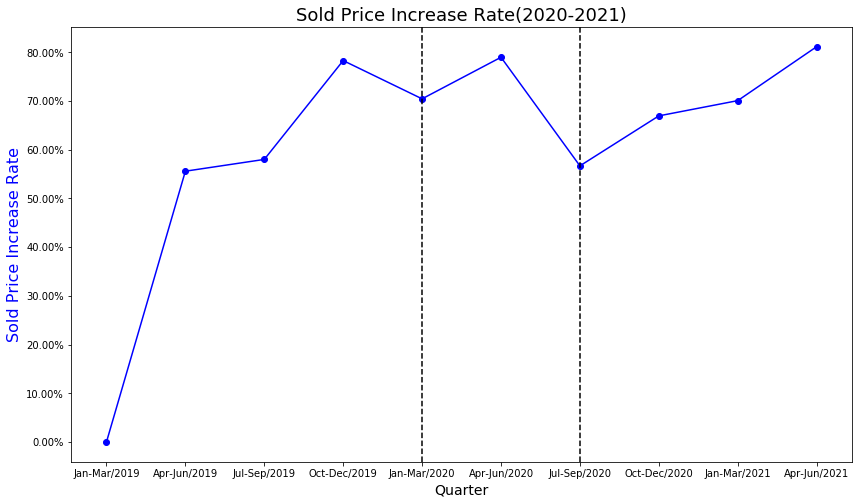

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fmt = '{x:.2f}%'
tick = mtick.StrMethodFormatter(fmt)

time_points = ['Jan-Mar/2019','Apr-Jun/2019', 'Jul-Sep/2019', 'Oct-Dec/2019', 'Jan-Mar/2020', 'Apr-Jun/2020', 'Jul-Sep/2020', 'Oct-Dec/2020', 'Jan-Mar/2021', 'Apr-Jun/2021']
ax.plot(time_points,percentage_change_r[0]*100,color = "blue", marker = "o",label = 'Sold Price Increase Rate')
# set x_axis label
ax.set_xlabel("Quarter",fontsize=14)
# set y-axis label
ax.set_ylabel("Sold Price Increase Rate",color="Blue",fontsize=16)
ax.set_title("Sold Price Increase Rate(2020-2021)",fontsize=18)
ax.yaxis.set_major_formatter(tick) 



ax.axvline('Jan-Mar/2020', color='k', linestyle='--')
ax.axvline('Jul-Sep/2020', color='k', linestyle='--')
plt.savefig("Savefig/Sold Price Increase Rate(2020-2021).png")
plt.show()

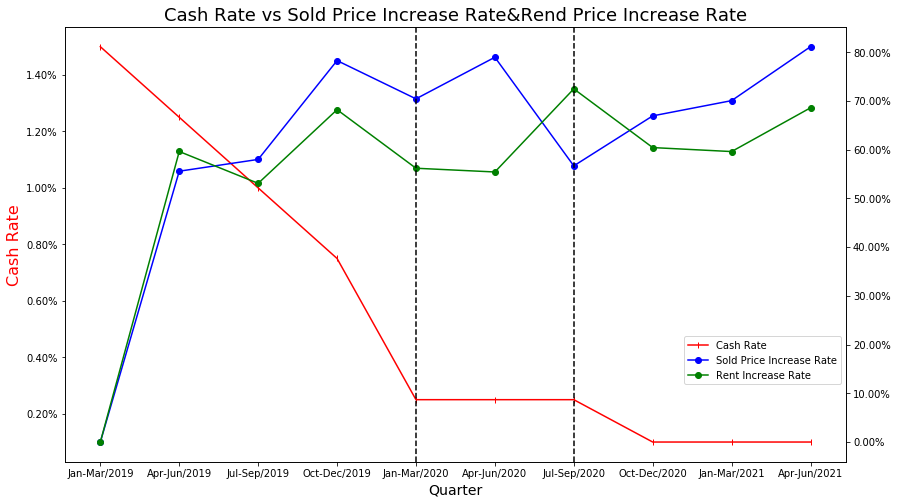

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fmt = '{x:.2f}%'
tick = mtick.StrMethodFormatter(fmt)

time_points = ['Jan-Mar/2019','Apr-Jun/2019', 'Jul-Sep/2019', 'Oct-Dec/2019', 'Jan-Mar/2020', 'Apr-Jun/2020', 'Jul-Sep/2020', 'Oct-Dec/2020', 'Jan-Mar/2021', 'Apr-Jun/2021']
ax.plot(time_points,Cash_Rate_RBA['Cash rate target from RBA']*100, color = 'red',marker = "|")
# set x_axis label
ax.set_xlabel("Quarter",fontsize=14)
# set y-axis label
ax.set_ylabel("Cash Rate",color="red",fontsize=16)
ax.set_title("Cash Rate vs Sold Price Increase Rate&Rent Price Increase Rate",fontsize=18)
ax.yaxis.set_major_formatter(tick) 

ax2 = ax.twinx()
#ax3 = ax.twinx()
ax2.plot(time_points,percentage_change_r[0]*100,color = "blue", marker = "o")
ax2.plot(time_points,rpercentage_change_r[0]*100,color = "green", marker = "o") 
ax2.yaxis.set_major_formatter(tick) 



ax2.legend([ax.get_lines()[0],ax2.get_lines()[0], ax2.get_lines()[1]],['Cash Rate','Sold Price Increase Rate','Rent Increase Rate'], bbox_to_anchor=(1, 0.3))
ax2.axvline('Jan-Mar/2020', color='k', linestyle='--')
ax2.axvline('Jul-Sep/2020', color='k', linestyle='--')
plt.savefig("Savefig/Cash Rate vs Sold Price Increase Rate&Rent Price Increase Rate.png")
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fmt = '{x:.2f}%'
tick = mtick.StrMethodFormatter(fmt)

time_points = ['Jan-Mar/2019','Apr-Jun/2019', 'Jul-Sep/2019', 'Oct-Dec/2019', 'Jan-Mar/2020', 'Apr-Jun/2020', 'Jul-Sep/2020', 'Oct-Dec/2020', 'Jan-Mar/2021', 'Apr-Jun/2021']
ax.plot(time_points,Cash_Rate_RBA['Cash rate target from RBA']*100, color = 'red',marker = "|")
# set x_axis label
ax.set_xlabel("Quarter",fontsize=14)
# set y-axis label
ax.set_ylabel("Cash Rate",color="red",fontsize=16)
ax.set_title("Cash Rate vs Sold Price Increase Rate&Rend Price Increase Rate",fontsize=18)
ax.yaxis.set_major_formatter(tick) 

ax2 = ax.twinx()
#ax3 = ax.twinx()
ax2.plot(time_points,percentage_change_r[0]*100,color = "blue", marker = "o")
ax2.plot(time_points,rpercentage_change_r[0]*100,color = "green", marker = "o") 
ax2.yaxis.set_major_formatter(tick) 



ax2.legend([ax.get_lines()[0],ax2.get_lines()[0], ax2.get_lines()[1]],['Cash Rate','Sold Price Increase Rate','Rent Increase Rate'], bbox_to_anchor=(1, 0.3))
ax2.axvline('Jan-Mar/2020', color='k', linestyle='--')
ax2.axvline('Jul-Sep/2020', color='k', linestyle='--')
plt.savefig("Savefig/Cash Rate vs Sold Price Increase Rate&Rend Price Increase Rate.png")
plt.show()

In [62]:
quarter_data_2019_2nd

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,1015000.0,11.0,2000000.0,680000.0,680000.0,750000.0,1300000.0,...,1150000.0,22.0,2573000.0,115000.0,8.0,5.0,690.0,45.0,1250.0,400.0
1,3040,Aberfeldie,647,1200000.0,61.0,4400000.0,297000.0,466000.0,913000.0,1635000.0,...,1400000.0,102.0,4650000.0,280000.0,48.0,27.0,500.0,127.0,1200.0,295.0
2,3042,Airport West,757,925000.0,16.0,1400000.0,620000.0,620000.0,745000.0,1100000.0,...,950000.0,42.0,1470000.0,650000.0,11.0,7.0,495.0,39.0,1350.0,260.0
3,3021,Albanvale,787,547000.0,80.0,1255000.0,361000.0,410000.0,480000.0,640000.0,...,595000.0,263.0,2500000.0,62000.0,29.0,11.0,360.0,171.0,1200.0,250.0
4,3206,Albert Park,797,2698000.0,18.0,8600000.0,915000.0,915000.0,1990000.0,4664000.0,...,2595000.0,17.0,13000000.0,315000.0,9.0,3.0,950.0,23.0,2000.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3024,Wyndham Vale,45307,469000.0,61.0,800000.0,330000.0,350000.0,426000.0,525000.0,...,496000.0,437.0,770000.0,100000.0,3.0,NaN,350.0,155.0,500.0,295.0
385,3085,Yallambie,45427,690000.0,14.0,1500000.0,565000.0,565000.0,684000.0,820000.0,...,737000.0,19.0,1225000.0,550000.0,3.0,1.0,485.0,12.0,600.0,375.0
386,3091,Yarrambat,45747,NaN,2.0,1700000.0,1400000.0,NaN,NaN,NaN,...,NaN,6.0,2350000.0,750000.0,NaN,NaN,NaN,1.0,520.0,520.0
387,3013,Yarraville,45777,910000.0,51.0,1466000.0,575000.0,685000.0,791000.0,1061000.0,...,895000.0,98.0,1795000.0,459000.0,52.0,20.0,558.0,92.0,850.0,310.0


In [70]:
average_rent_listing = []
average_sold = []
average_sell_listing = []


dataframes = [quarter_data_2019_1st, quarter_data_2019_2nd,quarter_data_2019_3rd,quarter_data_2019_4th,quarter_data_2020_1st,quarter_data_2020_2nd,quarter_data_2020_3rd,quarter_data_2020_4th,quarter_data_2021_1st,quarter_data_2021_2nd]
for df in dataframes:
    average_rent_listing.append(df["numberRentListing"].mean())
    average_sold.append(df["numberSold"].mean())
    average_sell_listing.append(df["numberSaleListing"].mean())

number_pd = pd.DataFrame({"Time point" :time_points,
                          'Average rent listing number':average_rent_listing,
                          'Average sold number' : average_sold,
                          'Average sell listing number' :average_sell_listing})
number_pd

,Time point,Average rent listing number,Average sold number,Average sell listing number
0,Jan-Mar/2019,59.720994,27.203911,68.936675
1,Apr-Jun/2019,50.666667,28.114973,69.861702
2,Jul-Sep/2019,65.851541,30.328729,67.994638
3,Oct-Dec/2019,69.449591,34.645604,79.297872
4,Jan-Mar/2020,73.111732,30.455801,76.329787
5,Apr-Jun/2020,68.712707,28.539510,93.037333
6,Jul-Sep/2020,57.394958,27.334247,68.902439
7,Oct-Dec/2020,51.637394,21.288889,62.583562
8,Jan-Mar/2021,70.559557,37.419178,75.027248
9,Apr-Jun/2021,71.340000,41.332432,82.226667


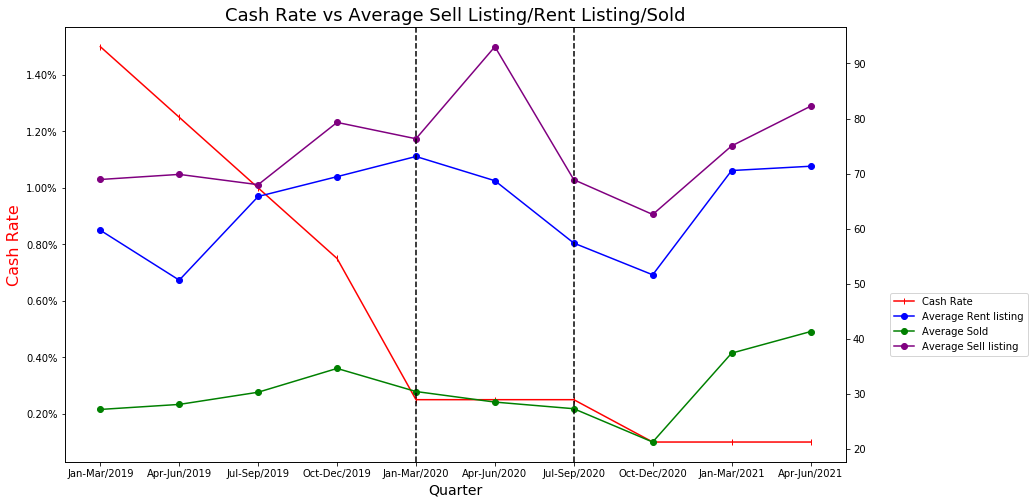

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fmt1 = '{x:.2f}%'
fmt2 = '{x:.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
tick2 = mtick.StrMethodFormatter(fmt2)
time_points = ['Jan-Mar/2019','Apr-Jun/2019', 'Jul-Sep/2019', 'Oct-Dec/2019', 'Jan-Mar/2020', 'Apr-Jun/2020', 'Jul-Sep/2020', 'Oct-Dec/2020', 'Jan-Mar/2021', 'Apr-Jun/2021']
ax.plot(time_points,Cash_Rate_RBA['Cash rate target from RBA']*100, color = 'red',marker = "|")
# set x_axis label
ax.set_xlabel("Quarter",fontsize=14)
# set y-axis label
ax.set_ylabel("Cash Rate",color="red",fontsize=16)
ax.set_title("Cash Rate vs Average Sell Listing/Rent Listing/Sold",fontsize=18)
ax.yaxis.set_major_formatter(tick1) 

ax2 = ax.twinx()
#ax3 = ax.twinx()
ax2.plot(time_points,number_pd["Average rent listing number"],color = "blue", marker = "o")
ax2.plot(time_points,number_pd["Average sold number"],color = "green", marker = "o") 
ax2.plot(time_points,number_pd["Average sell listing number"],color = "purple", marker = "o") 
ax2.yaxis.set_major_formatter(tick2) 


ax2.legend([ax.get_lines()[0],ax2.get_lines()[0], ax2.get_lines()[1],ax2.get_lines()[2]],['Cash Rate','Average Rent listing','Average Sold', 'Average Sell listing'], bbox_to_anchor=(1.05, 0.4))
ax2.axvline('Jan-Mar/2020', color='k', linestyle='--')
ax2.axvline('Jul-Sep/2020', color='k', linestyle='--')
plt.savefig("Savefig/Cash Rate vs Average Sell Listing&Rent Listing&Sold.png")
plt.show()